In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Load and Clean Data

In [28]:
calendar = pd.read_csv("Data/calendar.csv", parse_dates=["date"], index_col='date')

In [3]:
calendar.keys()

Index([u'listing_id', u'available', u'price', u'metro_area'], dtype='object')

In [4]:
calendar[:10]

,listing_id,available,price,metro_area
date,,,,
2018-03-05,2515,t,$69.00,NYC
2018-03-04,2515,t,$69.00,NYC
2018-03-03,2515,t,$69.00,NYC
2018-03-02,2515,t,$69.00,NYC
2018-03-01,2515,t,$69.00,NYC
2018-02-28,2515,t,$59.00,NYC
2018-02-27,2515,t,$59.00,NYC
2018-02-26,2515,t,$59.00,NYC
2018-02-25,2515,t,$59.00,NYC


In [5]:
# convert 't' and 'f' in dataset to 1 and 0
calendar['available'] = (calendar['available']=='t').astype(int)

In [48]:
# convert price to float
calendar['price'] = calendar['price'].replace('[\$,)]', '', regex=True).astype(float)

In [49]:
calendar[:10]

,listing_id,available,price,metro_area
date,,,,
2018-03-05,2515,t,69.0,NYC
2018-03-04,2515,t,69.0,NYC
2018-03-03,2515,t,69.0,NYC
2018-03-02,2515,t,69.0,NYC
2018-03-01,2515,t,69.0,NYC
2018-02-28,2515,t,59.0,NYC
2018-02-27,2515,t,59.0,NYC
2018-02-26,2515,t,59.0,NYC
2018-02-25,2515,t,59.0,NYC


# Price and Availability by City

In [31]:
calendar['metro_area'].unique()

array(['NYC', 'denver', 'chicago', 'boston', 'dc'], dtype=object)

In [50]:
calendar.groupby('metro_area')['price'].aggregate(np.mean)

metro_area
NYC        165.904913
boston     198.438909
chicago    167.022702
dc         243.322393
denver     145.892388
Name: price, dtype: float64

In [54]:
metro_month_calendar = calendar.groupby('metro_area').resample('M', how=np.mean)

In [ ]:
metro_month_calendar.plot()

## Available Listings

We look at the total number of unique listings (by listing ID) that were available each month and each week.

In [30]:
# unique listing IDs
calendar.listing_id.unique(kind='bar', figsize=(15,5))

array([    2515,     2595,     3647, ..., 17792195, 18223756, 18364166])

In [22]:
calendar.groupby('listing_id').aggregate(sum)

,available
listing_id,
590,136
592,98
686,317
930,361
1235,0
2384,102
2476,0
2515,306
2595,365


In [18]:
calendar.groupby('listing_id')['available'].resample('M', how=np.sum).plot(kind='bar', figsize=(15,5))

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/pandas/core/groupby.py:1138: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  return get_resampler_for_grouping(self, rule, *args, **kwargs)


KeyboardInterrupt: 

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


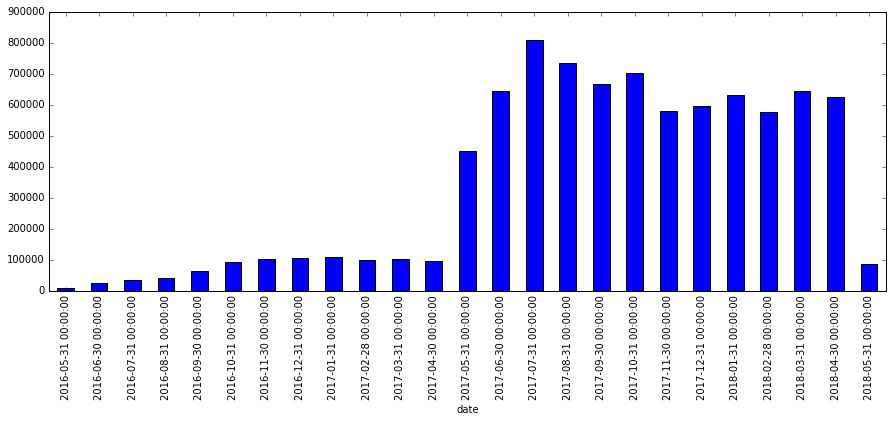

In [7]:
# monthly data for total number of available bookings
calendar['available'].resample('M', how=np.sum).plot(kind='bar', figsize=(15,5))

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


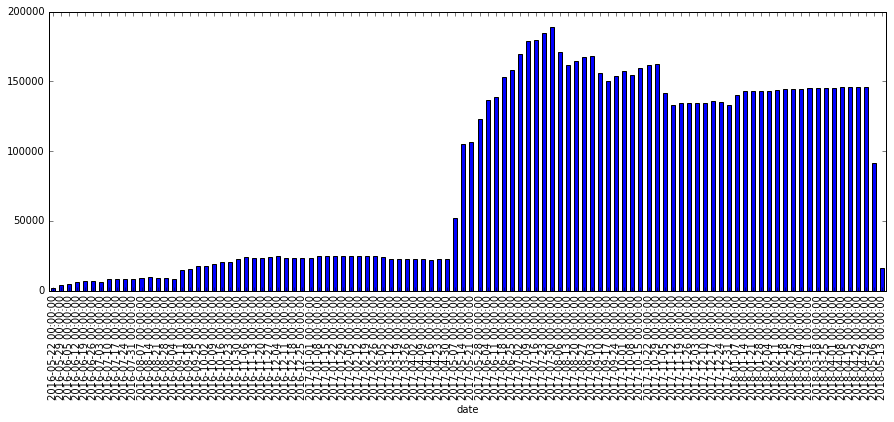

In [8]:
# weekly data for total number of available bookings
calendar['available'].resample('W', how=np.sum).plot(kind='bar', figsize=(15,5))

In [ ]:
# average price of all listings (available and unavailable) by month
calendar['price'].resample('M', how=np.mean).plot(kind='bar', figsize=(15,5))

In [ ]:
# listings by day
berri_bikes.index.weekday